In [3]:
###  THIS WORK IS NOT COMPLETE> WORK IN PROGRESS
#Data Sources:
#Flights: Bureau of Transportation Statistics On-Time data (https://www.transtats.bts.gov/ONTIME/)
#Weather: NOAA Daily Summary (https://www.ncdc.noaa.gov/cdo-web/datatools)
#Airport Cordinates: Open Flights (https://openflights.org/data.html)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dfAug = pd.read_csv('AUG.csv')
dfSep = pd.read_csv('SEP.csv')
df=pd.concat([dfAug,dfSep])
del dfAug
del dfSep

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
len(df)

969178

In [7]:
#Dropping unnecessary columns
df.drop(['OP_CARRIER_AIRLINE_ID','OP_UNIQUE_CARRIER','ORIGIN_AIRPORT_SEQ_ID',
            'ORIGIN_STATE_FIPS','DEST_AIRPORT_SEQ_ID','DEST_STATE_FIPS','DEP_DELAY_GROUP','WHEELS_OFF',
           'WHEELS_ON','ARR_DELAY_GROUP','ARR_TIME_BLK','ARR_TIME_BLK','DIV_ACTUAL_ELAPSED_TIME','DIV1_AIRPORT_SEQ_ID',
            'DIV1_WHEELS_ON','DIV1_TOTAL_GTIME','DIV1_LONGEST_GTIME','DIV1_TAIL_NUM'],axis=1,inplace=True)

In [8]:
#df.iloc[0:10,10:22]

In [9]:
df[df['ORIGIN']=='IAH'].iloc[0:10,10:26]

ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
16611                  31453    IAH      Houston, TX               TX   
16688                  31453    IAH      Houston, TX               TX   
16748                  31453    IAH      Houston, TX               TX   
16758                  31453    IAH      Houston, TX               TX   
16942                  31453    IAH      Houston, TX               TX   
16958                  31453    IAH      Houston, TX               TX   
16980                  31453    IAH      Houston, TX               TX   
17048                  31453    IAH      Houston, TX               TX   
17093                  31453    IAH      Houston, TX               TX   
17183                  31453    IAH      Houston, TX               TX   

      ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
16611           Texas          74            11042                30647  CLE   
16688           Texas          74            11292                30325  DEN   
16748           Texas          74            11292                30325  DEN   
16758           Texas          74            10397                30397  ATL   
16942           Texas          74            12889                32211  LAS   
16958           Texas          74            11193                33105  CVG   
16980           Texas          74            11292                30325  DEN   
17048           Texas          74            11292                30325  DEN   
17093           Texas          74            14100                34100  PHL   
17183           Texas          74            11042                30647  CLE   

         DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_NM  DEST_WAC  CRS_DEP_TIME  \
16611     Cleveland, OH             OH          Ohio        44          1620   
16688        Denver, CO             CO      Colorado        82          1059   
16748        Denver, CO             CO      Colorado        82          1936   
16758       Atlanta, GA             GA       Georgia        34          1825   
16942     Las Vegas, NV             NV        Nevada        85          1620   
16958    Cincinnati, OH             KY      Kentucky        52          1515   
16980        Denver, CO             CO      Colorado        82          1059   
17048        Denver, CO             CO      Colorado        82          1936   
17093  Philadelphia, PA             PA  Pennsylvania        23          1718   
17183     Cleveland, OH             OH          Ohio        44          1620   

       DEP_TIME  DEP_DELAY  
16611    1613.0       -7.0  
16688    1056.0       -3.0  
16748    1933.0       -3.0  
16758    1819.0       -6.0  
16942    1640.0       20.0  
16958    1539.0       24.0  
16980    1103.0        4.0  
17048    1932.0       -4.0  
17093    2135.0      257.0  
17183    1609.0      -11.0

In [10]:
#Extracting flights to and from Houston
houFlights = df[(df['ORIGIN_CITY_MARKET_ID']==31453)|(df['DEST_CITY_MARKET_ID']==31453)]

In [11]:
len(houFlights)

59830

In [12]:
houFlights.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'DIV1_AIRPORT_ID', 'DIV1_WHEELS_OFF',
       'Unnamed: 68'],
      dtype='object')

Checking for flights with both Origin and Destination as Houston

In [13]:
houFlights[(houFlights['ORIGIN_CITY_MARKET_ID']==31453)&(houFlights['DEST_CITY_MARKET_ID']==31453)]

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, OP_CARRIER, TAIL_NUM, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DEL15, TAXI_OUT, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DEL15, CANCELLED, CANCELLATION_CODE, DIVERTED, AIR_TIME, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, DIV_AIRPORT_LANDINGS, DIV_REACHED_DEST, DIV_ARR_DELAY, DIV_DISTANCE, DIV1_AIRPORT, DIV1_AIRPORT_ID, DIV1_WHEELS_OFF, Unnamed: 68]
Index: []

[0 rows x 52 columns]

There are no flights with both Origin and Destination as Houston

## Feature Engineering

Extract date and weekday

In [14]:
houFlights['DATE'] = pd.to_datetime(houFlights['FL_DATE'],format='%Y-%m-%d')
houFlights['DAY_OF_WEEK_NAME'] = houFlights['DATE'].dt.weekday_name

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
houFlights['DEP_DELAY'] = houFlights['DEP_DELAY'].apply(lambda x:0.0 if x<0 else x)
houFlights['ARR_DELAY'] = houFlights['ARR_DELAY'].apply(lambda x:0.0 if x<0 else x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Replace airline codes with airline names

In [16]:
airlineMap = {'UA':'United','WN':'Southwest','EV':'ExpressJet','OO':'SkyWest','NK':'Spirit','AA':'American',
              'DL':'Delta','F9':'Frontier','B6':'JetBlue','AS':'Alaska'}
houFlights['CARRIER_NAME'] =  houFlights['OP_CARRIER'].map(airlineMap)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#method to set flight status
def getFlightStatus(args):
    if args[0] == 1:
        return 'Cancelled'
    elif args[1] == 1:
        return 'Diverted'
    else:
        return 'Completed'
    
def getCompleted(args):
    if ((int(args[0]) == 1) |( int(args[1]) == 1)):
        return 0
    else:
        return 1

In [18]:
houFlights['STATUS'] = houFlights[['CANCELLED','DIVERTED']].apply(getFlightStatus,axis=1)
houFlights['COMPLETED'] = houFlights[['CANCELLED','DIVERTED']].apply(getCompleted,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#Inbound/Outbound
houFlights['INBOUND'] = houFlights['DEST_CITY_NAME'].apply(lambda x: 1 if x == 'Houston, TX' else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
houFlights['DEP_HR_BLOCK'] = (houFlights['CRS_DEP_TIME']/100).astype(int)
houFlights['ARR_HR_BLOCK'] = (houFlights['CRS_ARR_TIME']/100).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Airport Data

Setting airport longitude and lattitude based on data from Open Flights

In [21]:
airports = pd.read_csv('airports.csv')
airports.head()

ID                                         Name          City  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            Country Code3 Code4       Lat         Lon  Altitude TimeZone DST  \
0  Papua New Guinea   GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea   MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea   HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea   LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea   POM  AYPY -9.443380  147.220001       146       10   U   

               TimeZOne     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [22]:
houFlights = pd.merge(houFlights,airports[['Code3','Lat','Lon']],left_on='ORIGIN',right_on='Code3',suffixes=['','_Ori'])
houFlights = pd.merge(houFlights,airports[['Code3','Lat','Lon']],left_on='DEST',right_on='Code3',suffixes=['','_Dest'])
houFlights.rename(columns={'Lat':'Lat_Ori','Lon':'Lon_Ori'}, inplace=True)
houFlights.drop(['Code3','Code3_Dest'],axis=1,inplace=True)

Adding flight direction

In [23]:
#Westbound Eastbound
houFlights['DIRECTION'] = houFlights.apply(lambda x:'EASTBOUND' if (x['Lon_Ori']<x['Lon_Dest']) else 'WESTBOUND',axis=1)

In [24]:
def setDivAirport(divApt):
    if (divApt != np.NaN):
        for  a in airports.items():
            if(divApt== a['Code3']):
                print(divApt)
    else:
        print('None')    

Plot all inbound flights

In [25]:
gByOriDest = houFlights[houFlights['INBOUND']==1].groupby(['ORIGIN','Lat_Ori','Lon_Ori','DEST','Lat_Dest','Lon_Dest']).size().reset_index()
gByOriDest.rename(columns={0:'Count'}, inplace=True)

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.plotly as py

airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = gByOriDest['Lon_Ori'],
        lat = gByOriDest['Lat_Ori'],
        hoverinfo = 'text',
        text = gByOriDest['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(gByOriDest) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ gByOriDest['Lon_Ori'][i], gByOriDest['Lon_Dest'][i] ],
            lat = [ gByOriDest['Lat_Ori'][i], gByOriDest['Lat_Dest'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )




layout = dict(geo={'scope':'usa'},
             showlegend=False)

fig = dict(data = flight_paths +airportsMap,layout=layout)
iplot(fig)

We see that most of the United hubs and Southwest mega stations have very high frequencies. The following cities have high frequencies:
- Denver
- Dallas
- Chicago
- New York/Newark
- Atlanta
- San Francisco
- Los Angeles

### Countplots

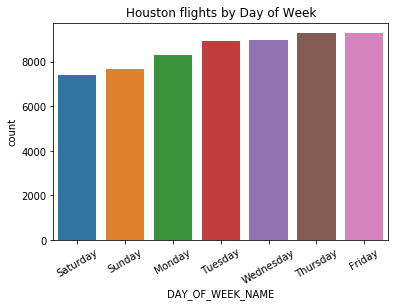

In [142]:
sns.countplot(data=houFlights,x='DAY_OF_WEEK_NAME')
plt.xticks(rotation=30)
plt.title("Houston flights by Day of Week")
plt.show()

There are more flights on weekdays than weekends. We do not have information about international flights. It is possible that airlines fly more international routes on Saturdays due to low domestic demand.

In [140]:
#houFlights['OP_CARRIER'].value_counts()

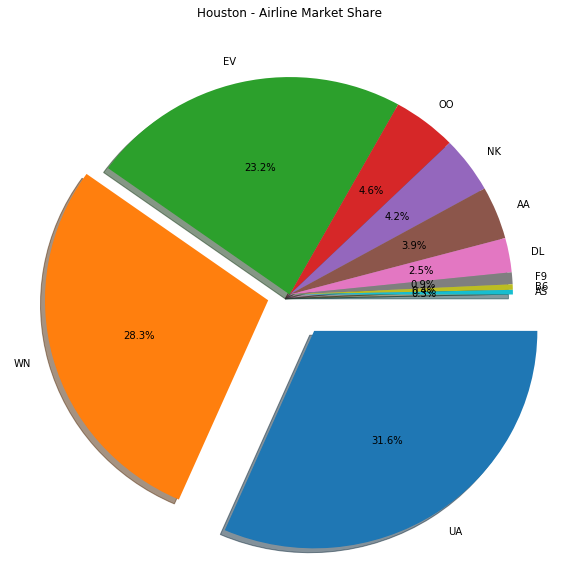

In [139]:
airlineCounts = houFlights['OP_CARRIER'].value_counts().to_frame().reset_index()
airlineCounts.rename(columns={'index':'Carrier','OP_CARRIER':'AirlineCount'}, inplace=True)
plt.figure(figsize=(10,10))
explode = (0.2, .1, 0, 0, 0, 0,0,0,0,0)
plt.pie(airlineCounts['AirlineCount'], labels=airlineCounts['Carrier'],explode=explode, autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Houston - Airline Market Share')
plt.show()

United and Southwest control about 60% of domestic flights into Houston. EV and OO trail WN but they can be considered as extension of United as they operate regional service on behalf of United.

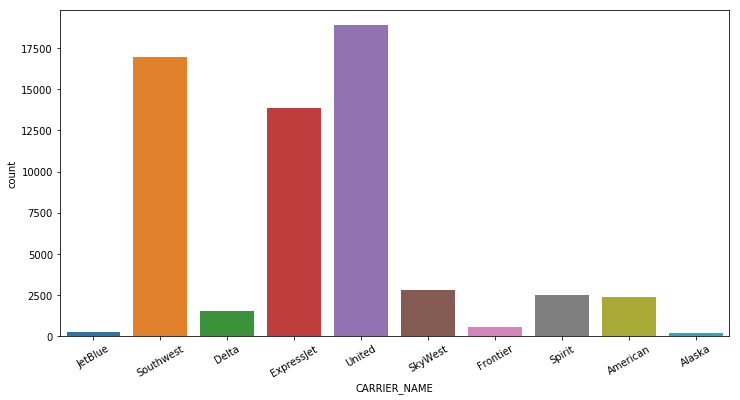

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights,x='CARRIER_NAME')
plt.xticks(rotation=30)
plt.show()

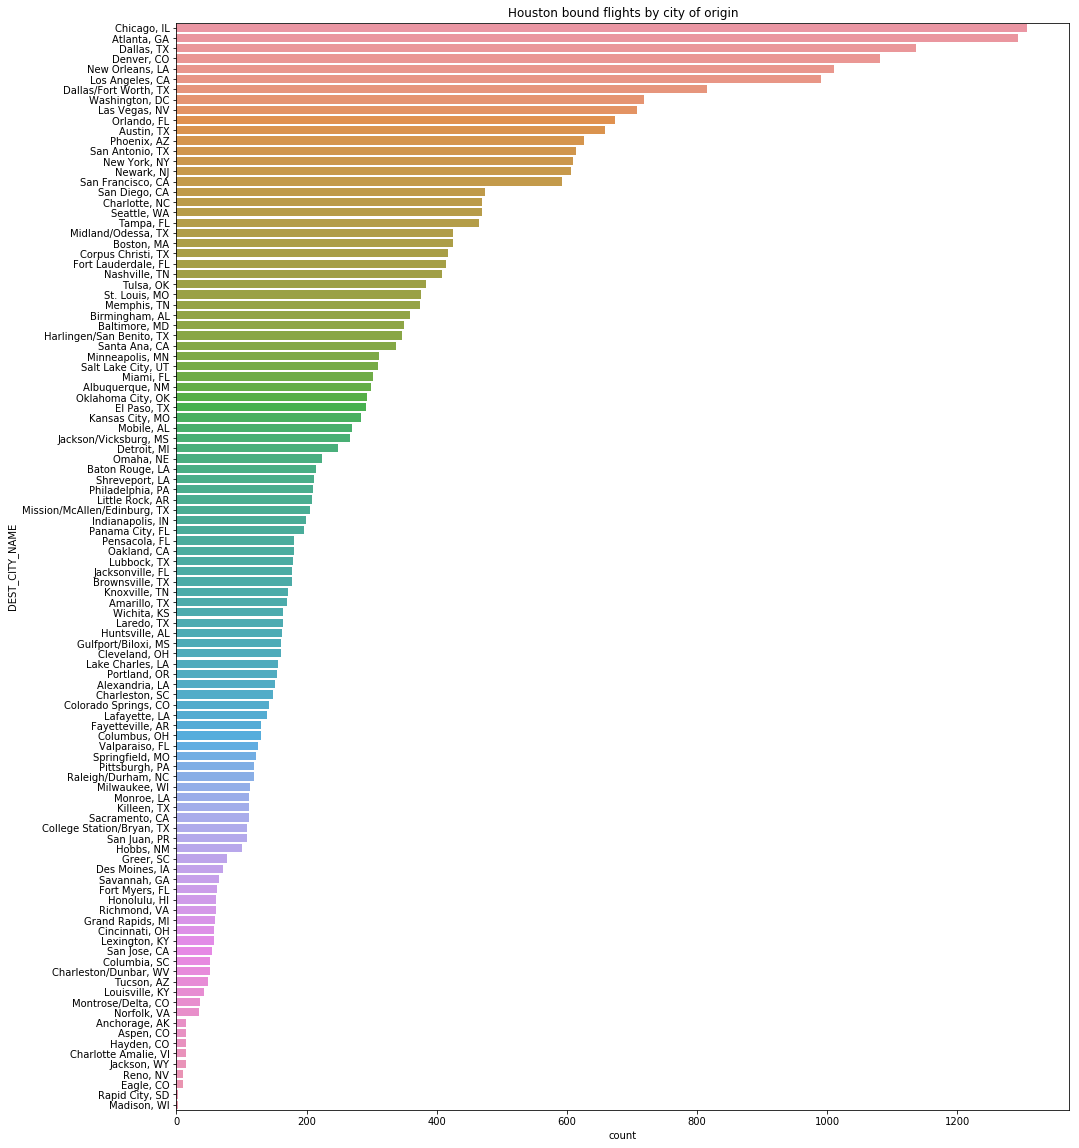

In [144]:
plt.figure(figsize=(16,20))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']!='Houston, TX'],y='DEST_CITY_NAME',
             order = houFlights[houFlights['DEST_CITY_NAME']!='Houston, TX']['DEST_CITY_NAME'].value_counts().index)
plt.title('Houston bound flights by city of origin')
plt.show()

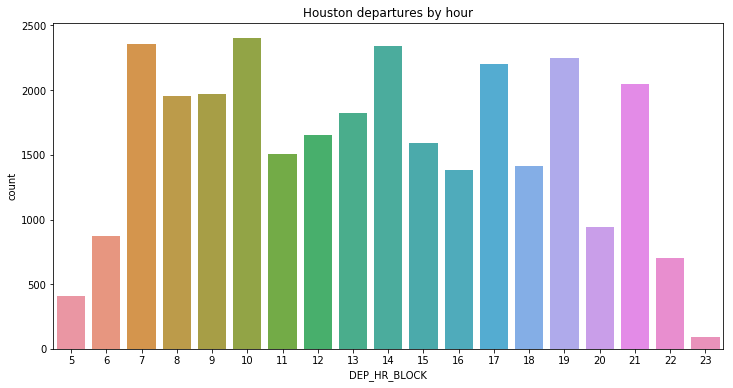

In [145]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['ORIGIN_CITY_NAME']=='Houston, TX'],x='DEP_HR_BLOCK')
plt.title('Houston departures by hour')
plt.show()

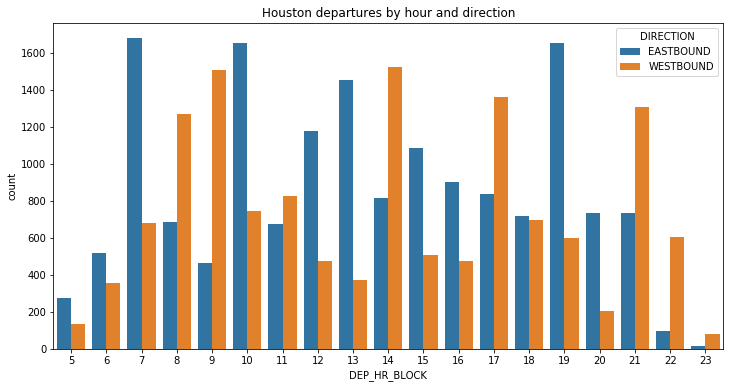

In [149]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['ORIGIN_CITY_NAME']=='Houston, TX'],x='DEP_HR_BLOCK',hue='DIRECTION')
plt.title('Houston departures by hour and direction')
plt.show()

Outbound flights start at 5AM and peak between 7AM and 10AM. Most of the east coast bound flights are scheduled at 7AM and 7PM. There are very few east bound flights after 7PM. The ones that fly after 7PM could be hubs (Chicago, Atlanta etc) and nearby cities such as New Orleans. 
Westbound departures start slow and peak at 9AM. The west bound flights before 9AM could be to nearby destinations such as Austin, Dallas and San Antonio. There is a high number of outbound flights at around 9PM and these could be California bound flights.

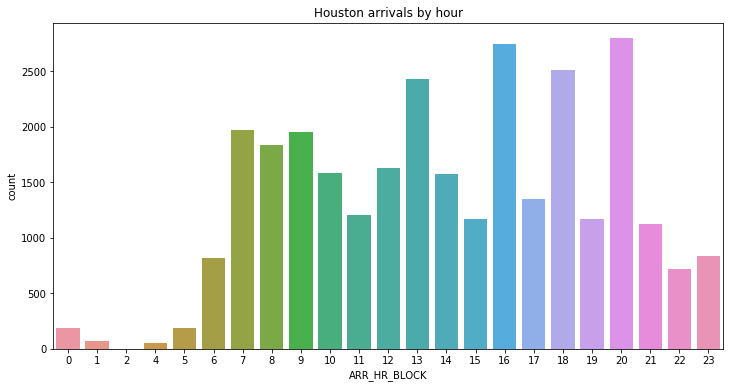

In [147]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']=='Houston, TX'],x='ARR_HR_BLOCK')
plt.title('Houston arrivals by hour')
plt.show()

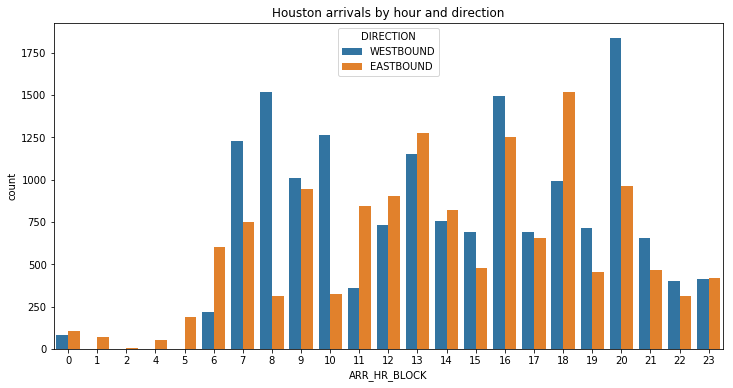

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(data=houFlights[houFlights['DEST_CITY_NAME']=='Houston, TX'],x='ARR_HR_BLOCK',hue='DIRECTION')
plt.title('Houston arrivals by hour and direction')
plt.show()

Arrivals peak between 4PM and 8PM. There are many eastbound arrivans before 6AM and these could be red-eye arrivals from West Coast cities such as San Francisco, Los Angeles and Seattle. This could also include early morning flights from nearby Texas cities. These could be feeding the first major eastbound departure bank at 7AM.
The highest number of arrivals from the east is at 8PM. This could eb the feed for the large westbound bank at 9PM and 10 PM. 

In [39]:
houFlights.iloc[0:10,1:22]

QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE OP_CARRIER TAIL_NUM  \
0        3      8            12            6  2017-08-12         B6   N520JB   
1        3      8            13            7  2017-08-13         B6   N579JB   
2        3      8            14            1  2017-08-14         B6   N559JB   
3        3      8            15            2  2017-08-15         B6   N526JB   
4        3      8            16            3  2017-08-16         B6   N648JB   
5        3      8            17            4  2017-08-17         B6   N547JB   
6        3      8            18            5  2017-08-18         B6   N629JB   
7        3      8            19            6  2017-08-19         B6   N827JB   
8        3      8            20            7  2017-08-20         B6   N510JB   
9        3      8            21            1  2017-08-21         B6   N568JB   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_CITY_MARKET_ID      ...       \
0                581              12478                  31703      ...        
1                581              12478                  31703      ...        
2                581              12478                  31703      ...        
3                581              12478                  31703      ...        
4                581              12478                  31703      ...        
5                581              12478                  31703      ...        
6                581              12478                  31703      ...        
7                581              12478                  31703      ...        
8                581              12478                  31703      ...        
9                581              12478                  31703      ...        

  ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM ORIGIN_WAC  \
0     New York, NY               NY        New York         22   
1     New York, NY               NY        New York         22   
2     New York, NY               NY        New York         22   
3     New York, NY               NY        New York         22   
4     New York, NY               NY        New York         22   
5     New York, NY               NY        New York         22   
6     New York, NY               NY        New York         22   
7     New York, NY               NY        New York         22   
8     New York, NY               NY        New York         22   
9     New York, NY               NY        New York         22   

   DEST_AIRPORT_ID  DEST_CITY_MARKET_ID  DEST DEST_CITY_NAME DEST_STATE_ABR  \
0            12191                31453   HOU    Houston, TX             TX   
1            12191                31453   HOU    Houston, TX             TX   
2            12191                31453   HOU    Houston, TX             TX   
3            12191                31453   HOU    Houston, TX             TX   
4            12191                31453   HOU    Houston, TX             TX   
5            12191                31453   HOU    Houston, TX             TX   
6            12191                31453   HOU    Houston, TX             TX   
7            12191                31453   HOU    Houston, TX             TX   
8            12191                31453   HOU    Houston, TX             TX   
9            12191                31453   HOU    Houston, TX             TX   

  DEST_STATE_NM  
0         Texas  
1         Texas  
2         Texas  
3         Texas  
4         Texas  
5         Texas  
6         Texas  
7         Texas  
8         Texas  
9         Texas  

[10 rows x 21 columns]

### Group by Date

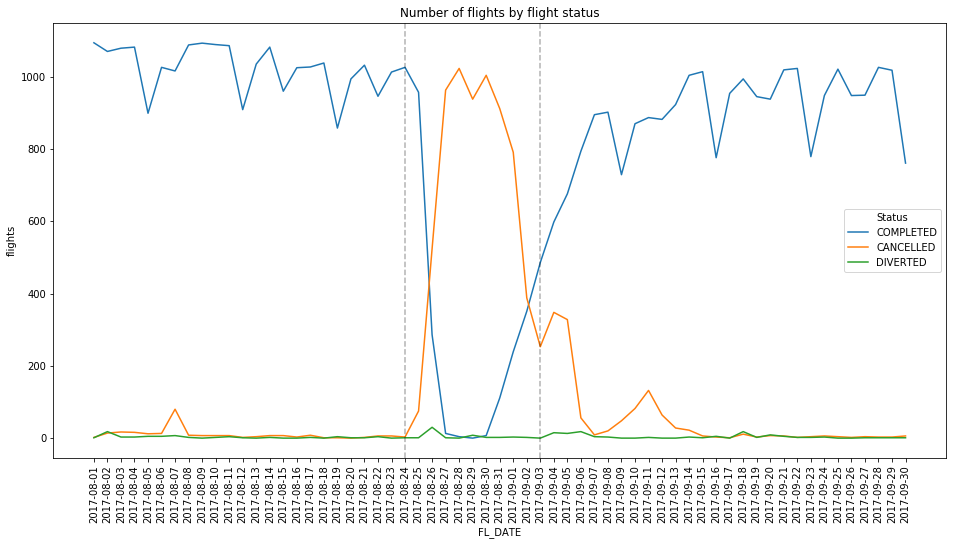

In [152]:
gByDateCCD = houFlights.groupby(['FL_DATE'],as_index=False).sum()[['FL_DATE','COMPLETED','CANCELLED','DIVERTED']]
byDateStatusFlat = gByDateCCD.melt('FL_DATE',var_name ='Status',value_name='flights')
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax = sns.lineplot(data=byDateStatusFlat,x='FL_DATE',y='flights',hue='Status')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Number of flights by flight status')
plt.show()

There were no completed flights between 8/29 and 8/30. There was a high number of diversions on 8/26

## Group by Date and Airline

In [156]:
#gByAirDate = houFlights.groupby(['FL_DATE','CARRIER_NAME'],as_index=False).count()[['FL_DATE','CARRIER_NAME','OP_CARRIER_FL_NUM']].rename(columns={'OP_CARRIER_FL_NUM':'flightsCount'})
gByAirDate = houFlights.groupby(['FL_DATE','CARRIER_NAME'],as_index=False).agg({
    'OP_CARRIER_FL_NUM':'count','CANCELLED':'sum','DIVERTED':'sum','COMPLETED':'sum'}).rename(columns={
    'OP_CARRIER_FL_NUM':'TOTAL'})

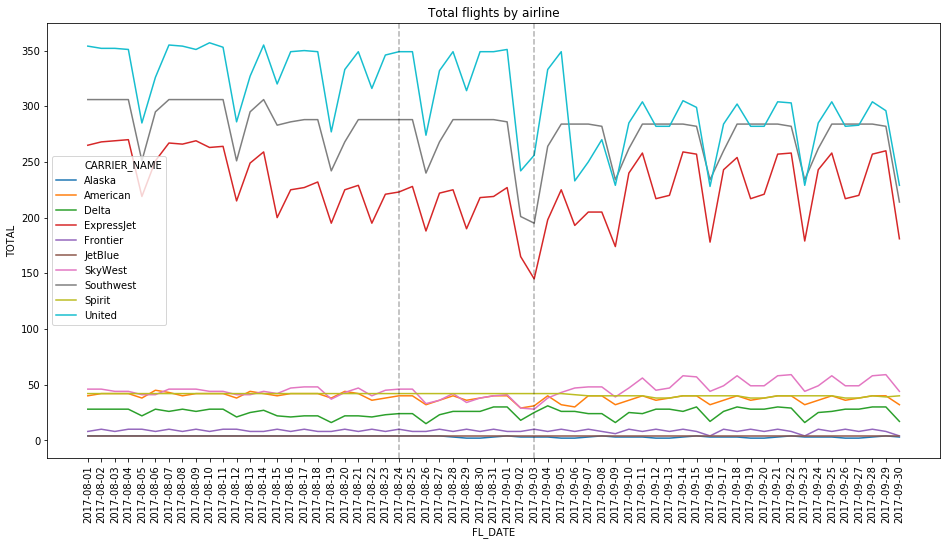

In [157]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='TOTAL',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Total flights by airline')
plt.show()

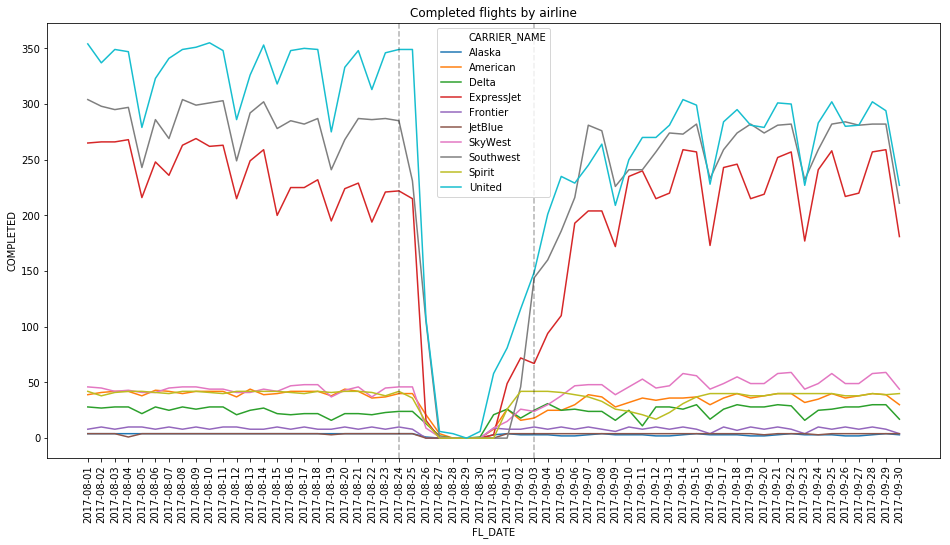

In [158]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='COMPLETED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Completed flights by airline')
plt.show()

United and Southwest do not recover to the same level of operation 10 dasy after the hurricane. Spirit also shows an interesting pattern.

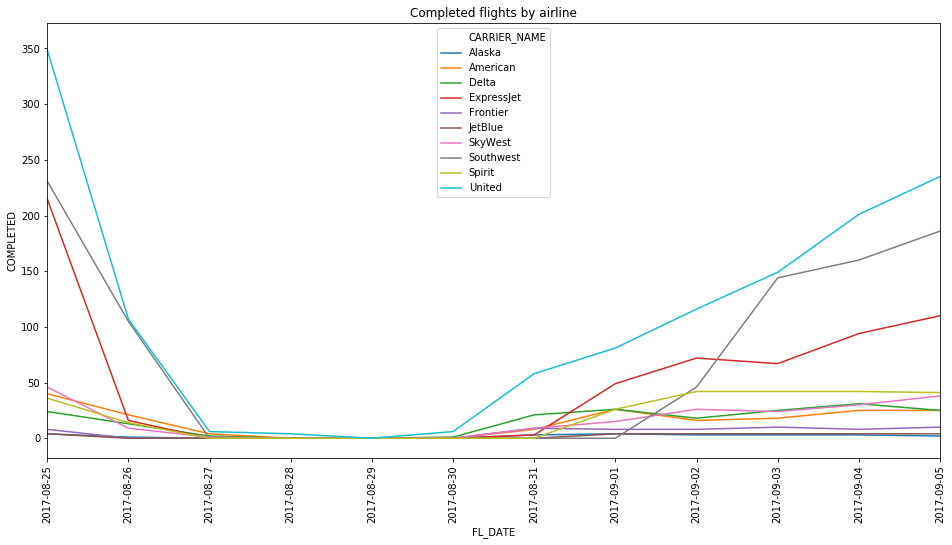

In [159]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='COMPLETED',hue='CARRIER_NAME')
plt.xlim('2017-08-25', '2017-09-05')
#plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
#plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Completed flights by airline')
plt.show()

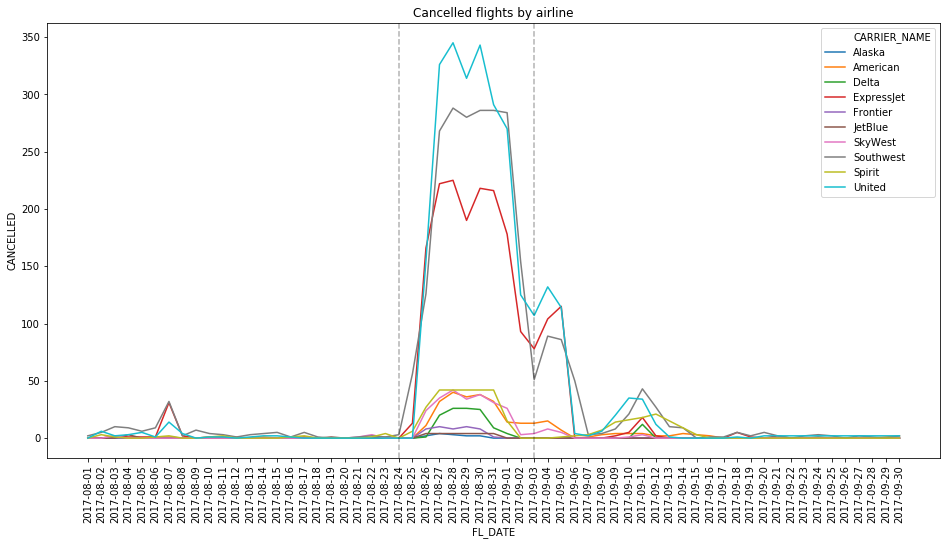

In [160]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='CANCELLED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Cancelled flights by airline')
plt.show()

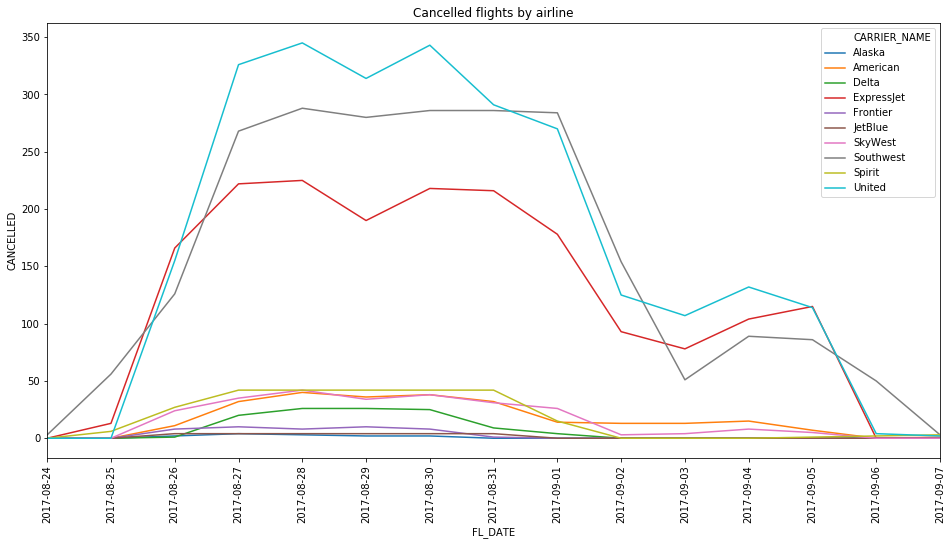

In [161]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=gByAirDate,x='FL_DATE',y='CANCELLED',hue='CARRIER_NAME')
plt.xlim('2017-08-24', '2017-09-07')
plt.title('Cancelled flights by airline')
plt.show()

### Diversions

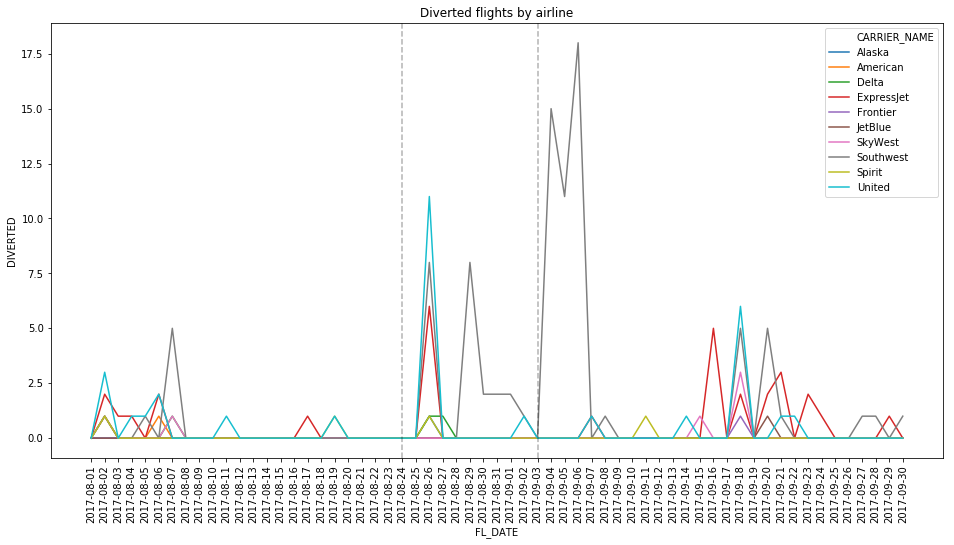

In [162]:
#Counting only Inbpound Diversions
divByDateAndAirline = houFlights[houFlights['INBOUND']==1].groupby(['FL_DATE','CARRIER_NAME'],as_index=False).agg({
    'OP_CARRIER_FL_NUM':'count','DIVERTED':'sum'}).rename(columns={
    'OP_CARRIER_FL_NUM':'TOTAL'})
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(data=divByDateAndAirline,x='FL_DATE',y='DIVERTED',hue='CARRIER_NAME')
plt.axvline('2017-08-24',linestyle='--',color='k',alpha=0.3)
plt.axvline('2017-09-03',linestyle='--',color='k',alpha=0.3)
plt.title('Diverted flights by airline')
plt.show()

Southwest has a large number of diversions after the hurricane. There are atleast 10 daily diversions each day till 9/7

In [164]:
houInboundDiversions = houFlights[(houFlights['INBOUND']==1)&(houFlights['DIVERTED']==1)&(houFlights['FL_DATE'] > '2017-08-24')]
houInboundDiversions = pd.merge(houInboundDiversions,airports[['Code3','Lat','Lon']],left_on='DIV1_AIRPORT',right_on='Code3',how='left',suffixes=['','_Div'])
houInboundDiversions.rename(columns={'Lat':'Lat_Div','Lon':'Lon_Div'}, inplace=True)
houInboundDiversions.drop(['Code3'],axis=1,inplace=True)

In [166]:
gByDiv = houInboundDiversions.groupby(['DIV1_AIRPORT','Lat_Div','Lon_Div']).size().reset_index()
gByDiv.rename(columns={0:'Count'}, inplace=True)
#gByDiv.sort_values(by='Count',ascending=False)

In [170]:
cities = []
scale = 0.5
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']

for i in range(len(gByDiv)):
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = gByDiv['Lon_Div'],
        lat = gByDiv['Lat_Div'],
        #text = str(gByDiv['DIV1_AIRPORT'])+str(gByDiv['Count']),
        text = gByDiv['DIV1_AIRPORT'],
        marker = dict(
            size = gByDiv['Count']/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ))
    cities.append(city)

layout = dict(geo={'scope':'usa'},
                title='Count of flights diverted to',
             showlegend=False)

fig = dict(data = cities ,layout=layout)
iplot(fig)

There are some diversions to locations such as OAK, LAX, DTW, ORD and Florida that are too far from Houston to be considered last minute diversions. Let us plot the map of their origin and diverted airport to understand what is happening here.

In [171]:
ldDivLoc = ['OAK','LAX','SAN','LAS','PHX','DTW','ORD','TPA','FLL','JAX']
longHouInboundDiversions = houInboundDiversions[houInboundDiversions['DIV1_AIRPORT'].isin(ldDivLoc)].reset_index()

In [175]:
airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = longHouInboundDiversions['Lon_Ori'],
        lat = longHouInboundDiversions['Lat_Ori'],
        hoverinfo = 'text',
        text = longHouInboundDiversions['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(longHouInboundDiversions) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ longHouInboundDiversions['Lon_Ori'][i], longHouInboundDiversions['Lon_Div'][i] ],
            lat = [ longHouInboundDiversions['Lat_Ori'][i], longHouInboundDiversions['Lat_Div'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            #opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )

layout = dict(geo={'scope':'usa'},
              title='Diverted flights (long distance)',
             showlegend=False)

fig = dict(data = flight_paths + airportsMap,layout=layout)
iplot(fig)

In [60]:
longHouInboundDiversions[['ORIGIN','DEST','DIV1_AIRPORT','OP_CARRIER','OP_CARRIER_FL_NUM']]

ORIGIN DEST DIV1_AIRPORT OP_CARRIER  OP_CARRIER_FL_NUM
0     ATL  HOU          PHX         WN               1937
1     ATL  HOU          PHX         WN               1937
2     ATL  HOU          PHX         WN               1937
3     ATL  HOU          PHX         WN               1937
4     TPA  HOU          SAN         WN               1549
5     ABQ  HOU          TPA         WN               4786
6     ABQ  HOU          TPA         WN               1802
7     BWI  HOU          LAX         WN               1662
8     BWI  HOU          LAS         WN               4496
9     BWI  HOU          LAX         WN               1662
10    BWI  HOU          OAK         WN               1518
11    BWI  HOU          LAX         WN               1662
12    MCO  HOU          OAK         WN               2007
13    OKC  HOU          LAX         WN               5147
14    RDU  HOU          LAS         WN               1066
15    RDU  HOU          LAS         WN               1066
16    RDU  HOU          LAS         WN               1066
17    SAN  HOU          JAX         WN               4479
18    SAT  HOU          FLL         WN                 18
19    HNL  IAH          LAX         UA                252
20    EWR  IAH          ORD         UA               1261
21    DTW  IAH          DTW         NK                939

The above map confirms my suspicion that these flights are not last minute diversions. Lets look closer at these flights:
- 4 flights from Atlanta to Houston Hobby were diverted to Albuquerqe
- A Tampa to Hobby flight was diverted San Diego
- 5 flights from baltimore to Hobby were diverted to Las vegas and Los Angeles
- The flight numbers are repeating
- Most of these routes belong to Southwest
As no airline will carry enough fuel to divert to a destination too far away from its destination airport, I am assuming that Southwest diverted their flights to the next airport on its route, skipping Houston Hobby.

In [61]:
shortHouInboundDiversions = houInboundDiversions[~houInboundDiversions['DIV1_AIRPORT'].isin(ldDivLoc)].reset_index()

In [179]:
airportsMap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = shortHouInboundDiversions['Lon_Ori'],
        lat = shortHouInboundDiversions['Lat_Ori'],
        hoverinfo = 'text',
        text = shortHouInboundDiversions['ORIGIN'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]


flight_paths = []
for i in range( len(shortHouInboundDiversions) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ shortHouInboundDiversions['Lon_Ori'][i], shortHouInboundDiversions['Lon_Div'][i] ],
            lat = [ shortHouInboundDiversions['Lat_Ori'][i], shortHouInboundDiversions['Lat_Div'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            #opacity = (float(gByOriDest['Count'][i])/float(gByOriDest['Count'].max())),
        )
    )




layout = dict(geo={'scope':'usa'},
              title='Diversions (excluding long distance Southwest hops)',
             showlegend=False)

fig = dict(data = flight_paths + airportsMap,layout=layout)
iplot(fig)

The above map shows that most eastbound flights were diverted to Austin, San Antonio and South Padre. Most westbound flights were diverted to Dallas and New Orleans

## Rain Data

In [182]:
weather_hou = pd.read_csv('Weather_HOU.csv')
weather_hou.head()

STATION                                    NAME      DATE  AWND  PRCP  \
0  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/1/2017  7.61  0.00   
1  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/2/2017  4.70  0.26   
2  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/3/2017  5.14  0.00   
3  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/4/2017  4.25  0.00   
4  USW00012918  HOUSTON WILLIAM P HOBBY AIRPORT, TX US  8/5/2017  5.14  0.29   

   TAVG  TMAX  TMIN  
0    87    95    80  
1    83    91    77  
2    82    94    77  
3    85    95    77  
4    84    95    77

In [183]:
weather_hou.drop(['STATION','NAME'],axis=1,inplace=True)
weather_hou['DATE'] = pd.to_datetime(weather_hou['DATE'],format='%m/%d/%Y')

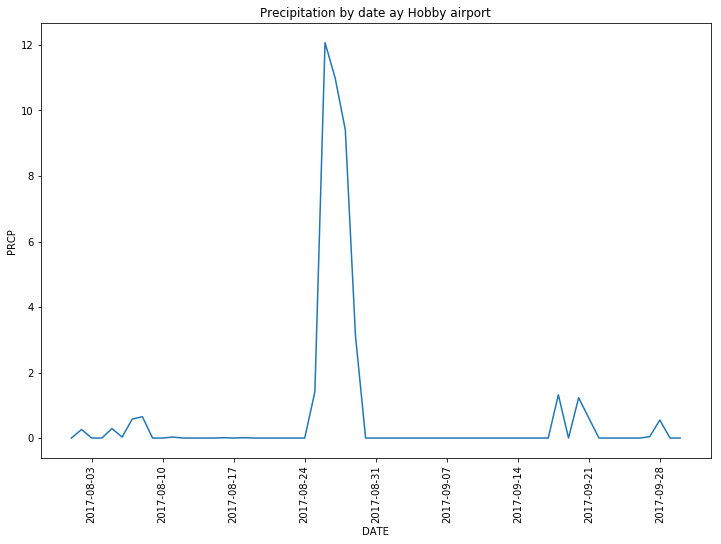

In [186]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(data=weather_hou,x='DATE',y='PRCP')
plt.title('Precipitation by date ay Hobby airport')
plt.show()

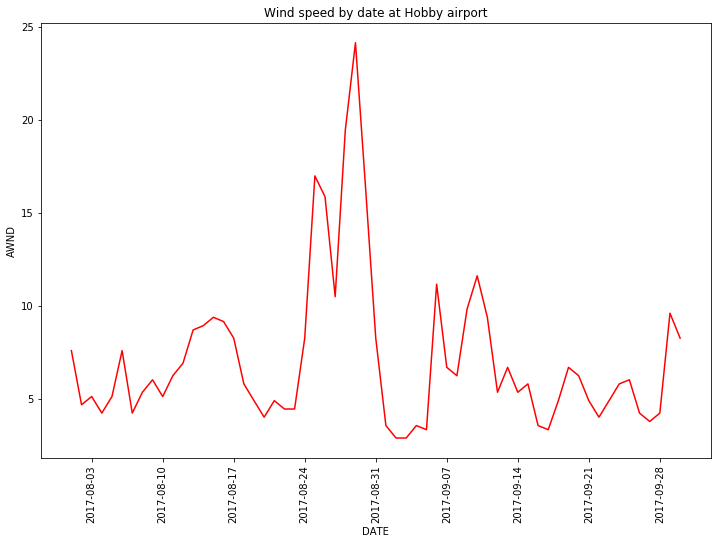

In [201]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(data=weather_hou,x='DATE',y='AWND',color='red')
#sns.lineplot(data=weather_hou,x='DATE',y='PRCP')
plt.title('Wind speed by date at Hobby airport')
plt.show()

In [68]:
weather_iah = pd.read_csv('weather_iah.csv')
weather_iah.drop(['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION'],axis=1,inplace=True)
weather_iah['DATE'] = pd.to_datetime(weather_iah['DATE'],format='%Y-%m-%d')

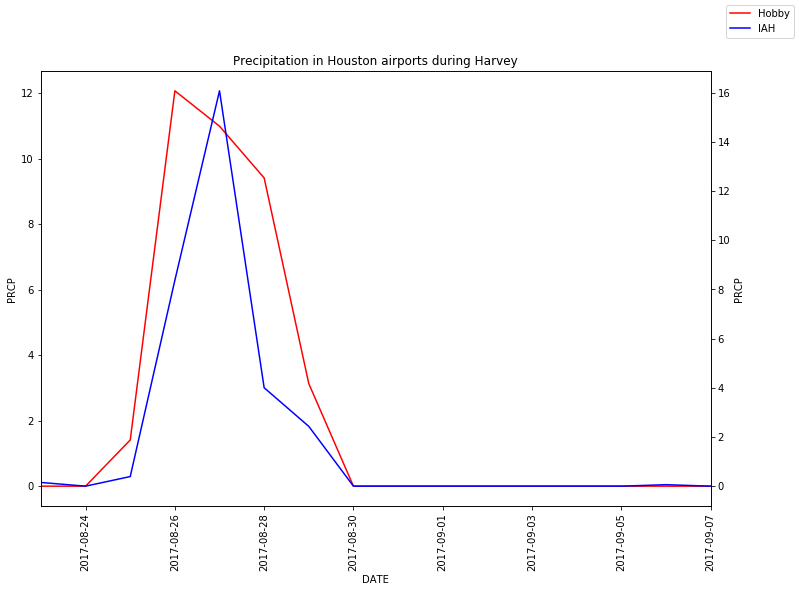

In [198]:
weather_iah = weather_iah[weather_iah['DATE']<'2017-10-01']
fig = plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
ax = sns.lineplot(data=weather_hou,x='DATE',y='PRCP',color='red',legend=False)
ax2 = ax.twinx()
sns.lineplot(data=weather_iah,x='DATE',y='PRCP',color='blue',legend=False,ax=ax2)
fig.legend(['Hobby','IAH'])
plt.xlim('2017-08-23', '2017-09-07')
plt.title('Precipitation in Houston airports during Harvey')
plt.show()

HOU recieved more rain than IAH. Also, Hobby received its maximim precipitation on 8/25th and but it continued to receive more than 10 inches of rain till 8/29. IAH recieved more than 4 inches of rain on one day only. So IAH was quik to recover than HOU. This explains the large number of cancellations and diversions from airlines based in HOU after the storm (Southwest and JetBlue)

## Flights in the storm

### United

In [75]:
houFlights[(houFlights['DATE'] == '2017-08-26')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')]['INBOUND'].value_counts()

1    55
0    52
Name: INBOUND, dtype: int64

In [76]:
houFlights[(houFlights['DATE'] == '2017-08-27')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')].iloc[:,6:20]

OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
16161         UA   N834UA                 75              12266   
19465         UA   N74856               1897              12266   
26768         UA   N56859                438              12266   
43171         UA   N13113                762              12264   
52022         UA   N806UA                527              12266   
52023         UA   N847UA                638              12266   

       ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
16161                  31453    IAH      Houston, TX               TX   
19465                  31453    IAH      Houston, TX               TX   
26768                  31453    IAH      Houston, TX               TX   
43171                  30852    IAD   Washington, DC               VA   
52022                  31453    IAH      Houston, TX               TX   
52023                  31453    IAH      Houston, TX               TX   

      ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
16161           Texas          74            11292                30325  DEN   
19465           Texas          74            12892                32575  LAX   
26768           Texas          74            14747                30559  SEA   
43171        Virginia          38            12266                31453  IAH   
52022           Texas          74            13930                30977  ORD   
52023           Texas          74            13930                30977  ORD   

        DEST_CITY_NAME  
16161       Denver, CO  
19465  Los Angeles, CA  
26768      Seattle, WA  
43171      Houston, TX  
52022      Chicago, IL  
52023      Chicago, IL

Most flights on 27th are outbound flights to hubs to fly out passengers stranded at IAH.

In [77]:
houFlights[(houFlights['DATE'] == '2017-08-28')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')].iloc[:,6:20]

OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
15929         UA   N77525                 75              12266   
15932         UA   N77258                825              12266   
29350         UA   N37420               1554              12266   
51515         UA   N63890                321              12266   

       ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
15929                  31453    IAH      Houston, TX               TX   
15932                  31453    IAH      Houston, TX               TX   
29350                  31453    IAH      Houston, TX               TX   
51515                  31453    IAH      Houston, TX               TX   

      ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
15929           Texas          74            11292                30325  DEN   
15932           Texas          74            11292                30325  DEN   
29350           Texas          74            11298                30194  DFW   
51515           Texas          74            12264                30852  IAD   

              DEST_CITY_NAME  
15929             Denver, CO  
15932             Denver, CO  
29350  Dallas/Fort Worth, TX  
51515         Washington, DC

We see a similar pattern on 28th, outbound flights to United hubs. There were no operations on 29th.

In [78]:
houFlights[(houFlights['DATE'] == '2017-08-30')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')].iloc[:,6:20]

OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
15912         UA   N78509                437              12266   
42507         UA   N27901               1615              14771   
43342         UA   N68822                341              11618   
43956         UA   N79402               1290              13930   
51769         UA   N33289               1074              12266   
52953         UA   N79402               1867              12266   

       ORIGIN_CITY_MARKET_ID ORIGIN   ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
15912                  31453    IAH        Houston, TX               TX   
42507                  32457    SFO  San Francisco, CA               CA   
43342                  31703    EWR         Newark, NJ               NJ   
43956                  30977    ORD        Chicago, IL               IL   
51769                  31453    IAH        Houston, TX               TX   
52953                  31453    IAH        Houston, TX               TX   

      ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  DEST_CITY_MARKET_ID DEST  \
15912           Texas          74            11292                30325  DEN   
42507      California          91            12266                31453  IAH   
43342      New Jersey          21            12266                31453  IAH   
43956        Illinois          41            12266                31453  IAH   
51769           Texas          74            13930                30977  ORD   
52953           Texas          74            11618                31703  EWR   

      DEST_CITY_NAME  
15912     Denver, CO  
42507    Houston, TX  
43342    Houston, TX  
43956    Houston, TX  
51769    Chicago, IL  
52953     Newark, NJ

This is where the recovery really started. On 30th, United flew flights to its hubs. We do not have enough data but this looks like cre-only flights to get starnded crew out and get new crew in to operate the flights based in Houston.

In [79]:
houFlights[(houFlights['DATE'] == '2017-08-31')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')]['INBOUND'].value_counts()

1    31
0    27
Name: INBOUND, dtype: int64

In [80]:
houFlights[(houFlights['DATE'] == '2017-08-31')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='UA')].iloc[:,6:20]

OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
15903         UA   N24212                437              12266   
15905         UA   N78524                825              12266   
15907         UA   N87512               1146              12266   
15908         UA   N68843               1672              12266   
15909         UA   N33292               1874              12266   
18471         UA   N73256               2091              12266   
19166         UA   N79402               1117              12266   
19170         UA   N66841               1236              12266   
19171         UA   N66814               1777              12266   
19173         UA   N68823               1813              12266   
19175         UA   N62889               1964              12266   
23152         UA   N12238               1131              12266   
30387         UA   N26210                 44              11292   
30388         UA   N24212                545              11292   
30390         UA   N68843               1114              11292   
30392         UA   N68805               1184              11292   
30393         UA   N78524               1819              11292   
30394         UA   N17244               1828              11292   
30395         UA   N87512               1874              11292   
30396         UA   N68843               1975              11292   
36310         UA   N66814               1125              12892   
36311         UA   N62889               1241              12892   
36312         UA   N36476               1407              12892   
36316         UA   N77867               1963              12892   
36317         UA   N66841               1981              12892   
36318         UA   N57870               1984              12892   
36319         UA   N72405               2027              12892   
42494         UA   N17245                912              14771   
42498         UA   N75858               1958              14771   
42499         UA   N53442               2058              14771   
43072         UA   N38417                249              12264   
43073         UA   N29124                484              12264   
43335         UA   N12238                663              11618   
43336         UA   N667UA                687              11618   
43337         UA   N79402               1161              11618   
43338         UA   N77537               1261              11618   
43339         UA   N68823               1534              11618   
43340         UA   N676UA               1810              11618   
43941         UA   N654UA                374              13930   
43942         UA   N643UA                589              13930   
43945         UA   N73406               1128              13930   
43948         UA   N66803               1875              13930   
43949         UA   N37408               2043              13930   
51503         UA   N29124                321              12266   
51504         UA   N68822                589              12266   
51756         UA   N643UA                462              12266   
51757         UA   N37408                527              12266   
51759         UA   N36476               1074              12266   
51761         UA   N66803               1256              12266   
51764         UA   N656UA               1967              12266   
52939         UA   N668UA                665              12266   
52941         UA   N72405                936              12266   
53543         UA   N68805                385              12266   
53548         UA   N77867               1541              12266   
53549         UA   N53442               1788              12266   
53550         UA   N73406               1844              12266   
53551         UA   N75858               1973              12266   
53552         UA   N64809               2382              12266   

       ORIGIN_CITY_MARKET_ID ORIGIN   ORIGIN_CITY_NA

We see a similar pattern on 8/31. Flights to hubs to evacuate passengers stranded in Houston. No connecting traffic.

### Southwest

In [81]:
houFlights[(houFlights['DATE'] == '2017-09-2')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='WN')]['INBOUND'].value_counts()

0    24
1    22
Name: INBOUND, dtype: int64

In [82]:
houFlights[(houFlights['DATE'] == '2017-09-2')&(houFlights['STATUS']=='Completed')&(houFlights['OP_CARRIER']=='WN')].iloc[:,6:20]

OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
388           WN   N203WN                744              11292   
390           WN   N7828A               2747              11292   
1717          WN   N462WN               2835              15016   
1901          WN   N8679A               4245              15304   
2473          WN   N488WN               2246              10423   
3062          WN   N8322X               5585              10821   
3179          WN   N910WN               2192              10994   
4115          WN   N627SW                 31              11259   
4116          WN   N8645A                 35              11259   
4122          WN   N390SW               2846              11259   
5118          WN   N8301J               1379              11697   
5332          WN   N640SW               5390              12206   
6252          WN   N8648A               2475              13198   
6470          WN   N264LV               3101              13204   
6800          WN   N454WN               2195              13232   
6801          WN   N8609A               2632              13232   
7375          WN   N634SW               2205              13495   
7378          WN   N468WN               3851              13495   
8049          WN   N7840A               3844              14057   
8207          WN   N8533S               5684              14107   
8568          WN   N8686A               2645              14679   
8569          WN   N920WN               4193              14679   
10342         WN   N8609A               2790              12191   
10343         WN   N931WN               3063              12191   
12888         WN   N468WN               2804              12191   
14500         WN   N627SW                 40              12191   
14501         WN   N8645A                 44              12191   
14507         WN   N8301J               1379              12191   
14510         WN   N7828A               2747              12191   
14511         WN   N640SW               5390              12191   
15121         WN   N910WN               2723              12191   
15682         WN   N8533S               2146              12191   
15683         WN   N203WN               2266              12191   
17630         WN   N634SW               2205              12191   
18054         WN   N390SW               2846              12191   
18337         WN   N920WN               3889              12191   
19050         WN   N488WN               2246              12191   
19052         WN   N8648A               2996              12191   
22050         WN   N8672F               2057              12191   
22053         WN   N8322X               3112              12191   
22055         WN   N8679A               4245              12191   
22897         WN   N264LV               3101              12191   
24610         WN   N454WN               2195              12191   
25418         WN   N462WN               2784              12191   
27628         WN   N8686A               2645              12191   
27977         WN   N7840A               3128              12191   

       ORIGIN_CITY_MARKET_ID ORIGIN          ORIGIN_CITY_NAME  \
388                    30325    DEN                Denver, CO   
390                    30325    DEN                Denver, CO   
1717                   31123    STL             St. Louis, MO   
1901                   33195    TPA                 Tampa, FL   
2473                   30423    AUS                Austin, TX   
3062                   30852    BWI             Baltimore, MD   
3179                   30994    CHS            Charleston, SC   
4115                   30194    DAL                Dallas, TX   
4116                   30194    DAL                Dallas, TX   
4122                   30194    DAL                Dallas, TX   
5118                   32467    FLL       Fort Lauderdale, FL   
5332                   32206    HRL  Harlingen/San Benito, TX   
6252       